In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import math
from collections import Counter, OrderedDict
from scipy.stats import shapiro
from scipy.stats import ks_2samp
import scipy.stats as stats
from scipy.stats import lognorm
import statsmodels.api as sm
from scipy.stats import norm
import pylab

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
# df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
# df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
# df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))

In [5]:
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')

In [6]:
groupDf = df[['user_id', 'Toxicity']]

In [7]:
groupDf2 = groupDf[['user_id', 'Toxicity']].astype({'user_id': str})

In [8]:
# weekDf = groupDf2[groupDf2['week']=="01"]

In [9]:
groupedDf = groupDf2.groupby(['user_id']).agg({'Toxicity': 'mean'}).reset_index()
# groupedDf = weekDf.groupby(['user_id']).agg({'Toxicity': 'mean'}).reset_index()

In [10]:
users_list = list(groupedDf['user_id'].unique().astype(str))

In [11]:
G2 = G.subgraph(users_list)

In [12]:
user_toxicity = groupedDf.set_index('user_id')['Toxicity'].to_dict()

In [13]:
neighbor_toxicity = {}
for user in G2.nodes():
  neighbors = list(G2.neighbors(user))
  if user in neighbors:
      neighbors.remove(user)
  if len(neighbors) > 0:
      neighbor_toxicity[user] = groupedDf[groupedDf['user_id'].isin(neighbors)]['Toxicity'].mean()

In [14]:
x = [user_toxicity[user] for user in neighbor_toxicity.keys()]
y = list(neighbor_toxicity.values())

In [15]:
diff = [x[i] - y[i] for i in range(len(x))]
diff2 = diff  
diff3 = diff
diff4 = diff
diff5 = diff

In [16]:
diff = [elem * 10 for elem in diff]
diff = [math.ceil(elem) if elem >= 0 else math.floor(elem) for elem in diff]
diff = [elem / 10 for elem in diff]

In [17]:
diff_counts = Counter(diff)

In [18]:
sum(diff_counts.values())

59837

In [19]:
sorted_counts = OrderedDict(sorted(diff_counts.items()))

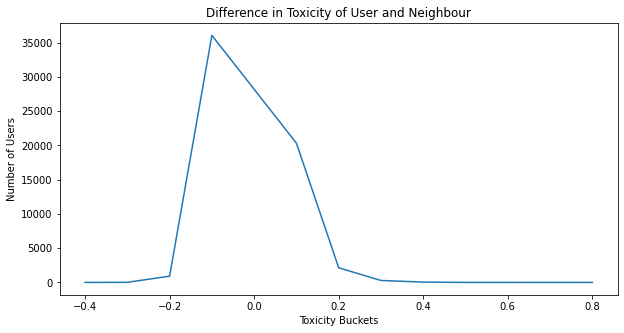

In [20]:
values = list(sorted_counts.keys())
counts = list(sorted_counts.values())

plt.figure(figsize=(10,5))
plt.plot(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

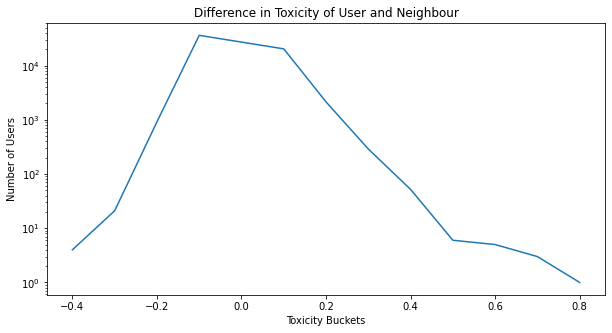

In [21]:
plt.figure(figsize=(10,5))
plt.semilogy(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

In [22]:
diff2 = [elem * 100 for elem in diff2]
diff2 = [math.ceil(elem) if elem >= 0 else math.floor(elem) for elem in diff2]
diff2 = [elem / 100 for elem in diff2]

In [23]:
diff2_counts = Counter(diff2)

In [24]:
sorted_counts2 = OrderedDict(sorted(diff2_counts.items()))

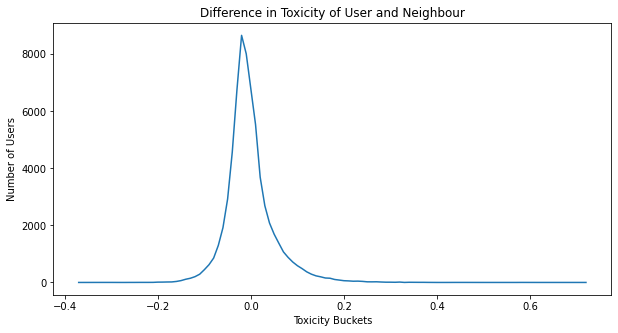

In [25]:
values = list(sorted_counts2.keys())
counts = list(sorted_counts2.values())

plt.figure(figsize=(10,5))
plt.plot(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

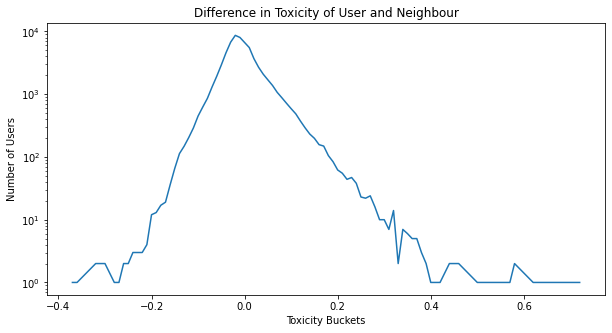

In [26]:
values = list(sorted_counts2.keys())
counts = list(sorted_counts2.values())

plt.figure(figsize=(10,5))
plt.semilogy(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

In [27]:
diff3 = [elem * 1000 for elem in diff3]
diff3 = [math.ceil(elem) if elem >= 0 else math.floor(elem) for elem in diff3]
diff3 = [elem / 1000 for elem in diff3]

In [28]:
diff3_counts = Counter(diff3)

In [29]:
sorted_counts3 = OrderedDict(sorted(diff3_counts.items()))

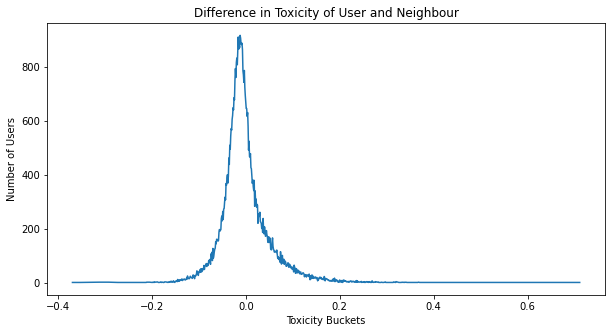

In [30]:
values = list(sorted_counts3.keys())
counts = list(sorted_counts3.values())

plt.figure(figsize=(10,5))
plt.plot(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

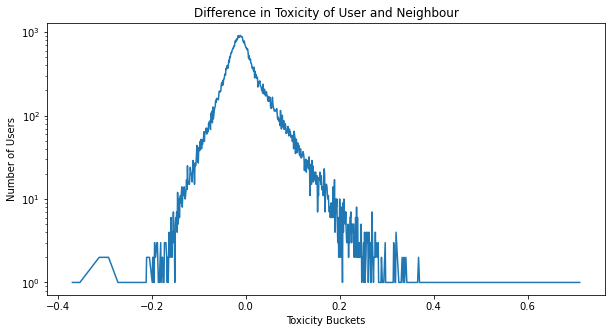

In [31]:
values = list(sorted_counts3.keys())
counts = list(sorted_counts3.values())

plt.figure(figsize=(10,5))
plt.semilogy(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

In [32]:
diff4 = [elem * 10000 for elem in diff4]
diff4 = [math.ceil(elem) if elem >= 0 else math.floor(elem) for elem in diff4]
diff4 = [elem / 10000 for elem in diff4]

In [33]:
diff4_counts = Counter(diff4)

In [34]:
sorted_counts4 = OrderedDict(sorted(diff4_counts.items()))

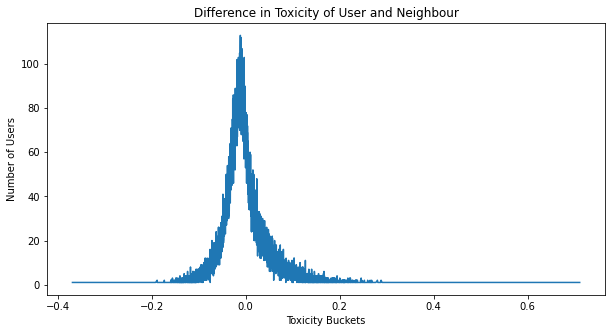

In [35]:
values = list(sorted_counts4.keys())
counts = list(sorted_counts4.values())

plt.figure(figsize=(10,5))
plt.plot(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

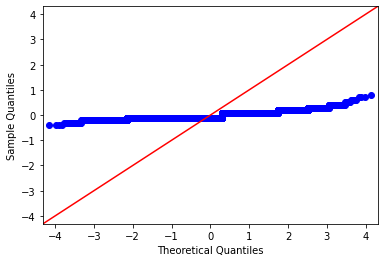

In [36]:
diff_qq = np.array(diff)
sm.qqplot(diff_qq, line='45')
pylab.show()

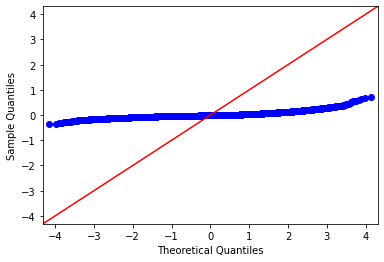

In [37]:
diff3_qq = np.array(diff3)
sm.qqplot(diff3_qq, line='45')
pylab.show()

In [38]:
stat, p = shapiro(diff)

print("diff")
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("The sample is normally distributed")
else:
    print("The sample is not normally distributed")

diff
Shapiro-Wilk test statistic: 0.7124841213226318
p-value: 0.0
The sample is not normally distributed


In [39]:
stat, p = shapiro(diff2)

print("diff2")
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("The sample is normally distributed")
else:
    print("The sample is not normally distributed")

diff2
Shapiro-Wilk test statistic: 0.9084965586662292
p-value: 0.0
The sample is not normally distributed


In [40]:
stat, p = shapiro(diff3)

print("diff3")
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("The sample is normally distributed")
else:
    print("The sample is not normally distributed")

diff3
Shapiro-Wilk test statistic: 0.8963295221328735
p-value: 0.0
The sample is not normally distributed


In [41]:
sample = np.random.normal(loc=0.0, scale=1.0, size=100)
stat, p = ks_2samp(sample, diff)
print("diff")
print("KS test statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("The list comes from the same distribution as the sample")
else:
    print("The list comes from a different distribution than the sample")

diff
KS test statistic: 0.4483368150141217
p-value: 7.417541642227285e-19
The list comes from a different distribution than the sample


In [42]:
sample = np.random.normal(loc=0.0, scale=1.0, size=100)
stat, p = ks_2samp(sample, diff2)
print("diff2")
print("KS test statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("The list comes from the same distribution as the sample")
else:
    print("The list comes from a different distribution than the sample")

diff2
KS test statistic: 0.4675556929658906
p-value: 1.4674667493169333e-20
The list comes from a different distribution than the sample


In [43]:
sample = np.random.normal(loc=0.0, scale=1.0, size=100)
stat, p = ks_2samp(sample, diff3)
print("diff3")
print("KS test statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("The list comes from the same distribution as the sample")
else:
    print("The list comes from a different distribution than the sample")

diff3
KS test statistic: 0.5098786703878871
p-value: 1.2353702524005794e-24
The list comes from a different distribution than the sample


In [44]:
# new_diff = [elem + 0.5 for elem in diff]

In [45]:
# min(new_diff)

In [46]:
shifted_diff = np.array(diff) - min(diff) + 1e-8
diff_boxcox, lambda_diff = stats.boxcox(shifted_diff)
print(lambda_diff)

0.22359171756190935


In [47]:
stat, p = shapiro(diff_boxcox)

# Print the test statistic and the p-value
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

# Check if the null hypothesis can be rejected or not
if p > 0.05:
    print("The sample is normally distributed")
else:
    print("The sample is not normally distributed")

Shapiro-Wilk test statistic: 0.7103276252746582
p-value: 0.0
The sample is not normally distributed


In [48]:
sample = np.random.normal(loc=0.0, scale=1.0, size=100)
stat, p = ks_2samp(sample, diff_boxcox)
print("KS test statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("The list comes from the same distribution as the sample")
else:
    print("The list comes from a different distribution than the sample")

KS test statistic: 0.7283368150141217
p-value: 1.330918618766328e-54
The list comes from a different distribution than the sample


In [49]:
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Shapiro-Wilk test for normality
shapiro(lognorm_dataset)

ShapiroResult(statistic=0.8982742428779602, pvalue=3.3371175477993476e-25)

In [50]:
xt, l = stats.boxcox(lognorm_dataset)

# Print lambda (the estimated power parameter)
print(l)

0.05248926340377711


In [51]:
stat, p = shapiro(xt)

# Print the test statistic and the p-value
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

# Check if the null hypothesis can be rejected or not
if p > 0.05:
    print("The sample is normally distributed")
else:
    print("The sample is not normally distributed")

Shapiro-Wilk test statistic: 0.9983406662940979
p-value: 0.45515286922454834
The sample is normally distributed
